In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
pip install opendatasets --upgrade --quiet

In [134]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/jimschacko/10-years-diabetes-dataset/code'
od.download(dataset_url)

Skipping, found downloaded files in "./10-years-diabetes-dataset" (use force=True to force download)


In [135]:
diabetes = pd.read_csv("/content/10-years-diabetes-dataset/diabetes.csv")

In [136]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [137]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [138]:
diabetes = diabetes.replace("?", np.NaN, )

In [139]:
diabetes.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [140]:
diabetes["race"]

0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 101766, dtype: object

In [141]:
#Replacing missing race with previous value – Forward fill

diabetes = diabetes.where(~diabetes.race.isnull(), diabetes.fillna(axis=0, method='ffill'))

In [142]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [143]:
count = (diabetes["race"] == "?").sum()
count

0

In [144]:
diabetes['weight'] = diabetes['weight'].fillna(diabetes['weight'].mode()[0])

In [145]:
diabetes = diabetes.where(~diabetes.payer_code.isnull(), diabetes.fillna(axis=0, method='ffill'))

In [146]:
diabetes = diabetes.where(~diabetes.medical_specialty.isnull(), diabetes.fillna(axis=0, method='ffill'))
diabetes = diabetes.where(~diabetes.diag_1.isnull(), diabetes.fillna(axis=0, method='ffill'))
diabetes = diabetes.where(~diabetes.diag_2.isnull(), diabetes.fillna(axis=0, method='ffill'))
diabetes = diabetes.where(~diabetes.diag_3.isnull(), diabetes.fillna(axis=0, method='ffill'))

In [147]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                81320 non-null   object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

# **EDA**

In [148]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),[75-100),6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),[75-100),1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),[75-100),1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),[75-100),1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),[75-100),1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [149]:
df = diabetes.groupby(["race"]).size().sort_values(ascending = False)
df

race
Caucasian          77840
AfricanAmerican    19622
Hispanic            2094
Other               1542
Asian                668
dtype: int64

In [150]:
Caucasian = diabetes.loc[diabetes["race"]=="Caucasian"].count()[0]
Afro_American = diabetes.loc[diabetes["race"]=="AfricanAmerican"].count()[0]
Hispanic = diabetes.loc[diabetes["race"]=="Hispanic"].count()[0]
Other = diabetes.loc[diabetes["race"]=="Other"].count()[0]
Asian = diabetes.loc[diabetes["race"]=="Asian"].count()[0]

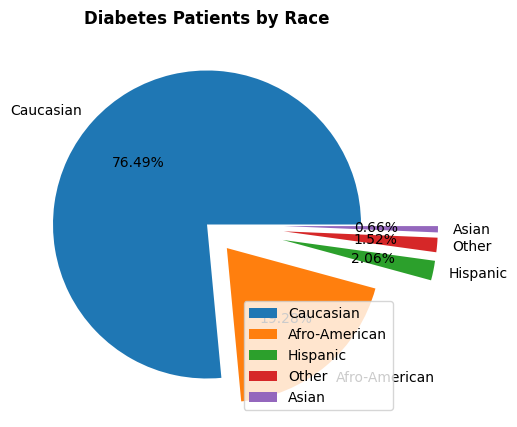

In [151]:
plt.figure(figsize = [5,5], dpi = 100)
labels = ["Caucasian", "Afro-American", "Hispanic", "Other", "Asian"]
explode = [0,0.2,0.5,0.5,0.5]

plt.pie([Caucasian, Afro_American, Hispanic, Other, Asian], labels = labels, autopct = "%0.2f%%", explode = explode)
plt.title("Diabetes Patients by Race", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

Caucasian are largest group of diabetic patients diagnosed, followed by Afro-American.**bold text**

In [152]:
df = diabetes.groupby(["gender"]).size().sort_values(ascending = False)
df

gender
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64

In [153]:
Male = diabetes.loc[diabetes["gender"]=="Male"].count()[0]
Female = diabetes.loc[diabetes["gender"]=="Female"].count()[0]
Other = diabetes.loc[diabetes["gender"]=="Other"].count()[0]

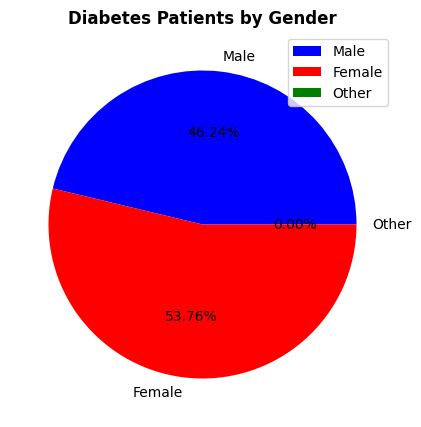

In [154]:
plt.figure(figsize = [5,5], dpi = 100)
labels = ["Male", "Female", "Other"]
colors = ["Blue", "Red", "Green"]

plt.pie([Male, Female, Other], colors = colors, labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients by Gender", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

Females are marginally more in number than Males. Others are negligible.**bold text**

In [155]:
df = diabetes.groupby(["age"]).size()
df

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
dtype: int64

In [156]:
df1 = pd.DataFrame(df)
df1.columns = ["Count"]
df1

,Count
age,
[0-10),161
[10-20),691
[20-30),1657
[30-40),3775
[40-50),9685
[50-60),17256
[60-70),22483
[70-80),26068
[80-90),17197


In [157]:
df1["pct"] = (df1["Count"]/(df1["Count"].sum()))*100
df1["pct"]

age
[0-10)       0.158206
[10-20)      0.679009
[20-30)      1.628245
[30-40)      3.709490
[40-50)      9.516931
[50-60)     16.956547
[60-70)     22.092840
[70-80)     25.615628
[80-90)     16.898571
[90-100)     2.744532
Name: pct, dtype: float64

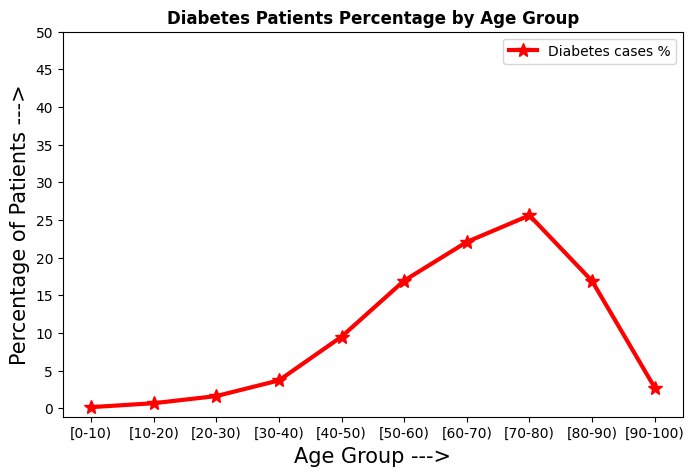

In [158]:
plt.figure(figsize = [8,5], dpi = 100)

plt.xlabel("Age Group --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})  # to label the axis x and y
plt.ylabel("Percentage of Patients --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})

plt.plot(df1["pct"], label = "Diabetes cases %", color = "red", linewidth = 3, marker = "*", markersize = 10)
plt.title("Diabetes Patients Percentage by Age Group", fontdict = {"fontweight": "bold"})

plt.yticks([0,5,10,15,20,25,30,35,40,45,50])

plt.legend()
plt.show()

Patients in age group [70-80) forms largest percentage of patients i.e. around 25%. While [0-10} form smallest percentage.**bold text**

In [159]:
t_in_h = pd.DataFrame(diabetes["time_in_hospital"].groupby(diabetes["age"]).mean())
t_in_h

,time_in_hospital
age,
[0-10),2.546584
[10-20),3.191027
[20-30),3.564876
[30-40),3.799735
[40-50),4.039649
[50-60),4.125753
[60-70),4.382244
[70-80),4.590878
[80-90),4.808629


In [160]:
l1 = list(t_in_h.index.values)
l2 = list(t_in_h["time_in_hospital"])
l1

['[0-10)',
 '[10-20)',
 '[20-30)',
 '[30-40)',
 '[40-50)',
 '[50-60)',
 '[60-70)',
 '[70-80)',
 '[80-90)',
 '[90-100)']

In [161]:
l2

[2.546583850931677,
 3.191027496382055,
 3.5648762824381413,
 3.7997350993377483,
 4.039648941662365,
 4.125753361149745,
 4.382244362407152,
 4.590877704465245,
 4.808629412106763,
 4.755818116720373]

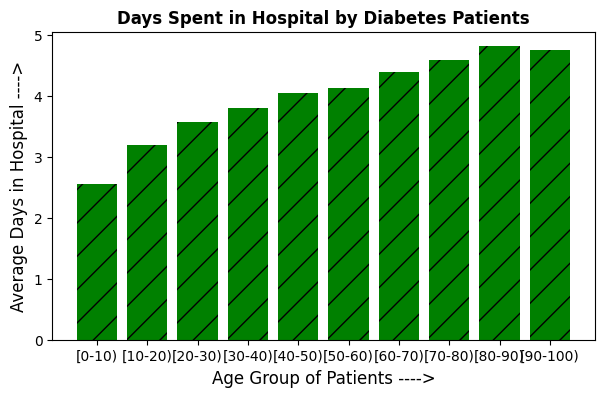

In [162]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.bar(l1,l2, color = "green", hatch = "/")
plt.ylabel("Average Days in Hospital ---->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 12})
plt.xlabel("Age Group of Patients ---->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 12})

plt.title("Days Spent in Hospital by Diabetes Patients", fontdict = {"fontweight": "bold"})

plt.show()

Patients in age group of [80-90) spend high number of day in hospital on an average.

In [163]:
num_lab = pd.DataFrame(diabetes["num_lab_procedures"].groupby(diabetes["age"]).mean())
l1 = list(num_lab.index.values)
l2 = list(num_lab["num_lab_procedures"])

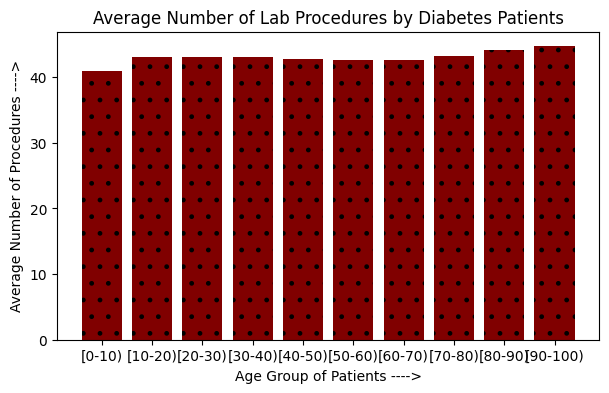

In [164]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.bar(l1,l2, color = "maroon", hatch = ".")
plt.ylabel("Average Number of Procedures ---->")
plt.xlabel("Age Group of Patients ---->")

plt.title("Average Number of Lab Procedures by Diabetes Patients")

plt.show()

Average number of Lab Procedures are almost similar for all age groups with slight increase above age of 70.

In [165]:
num_diag = pd.DataFrame(diabetes["number_diagnoses"].groupby(diabetes["age"]).mean())
l1 = list(num_diag.index.values)
l2 = list(num_diag["number_diagnoses"])

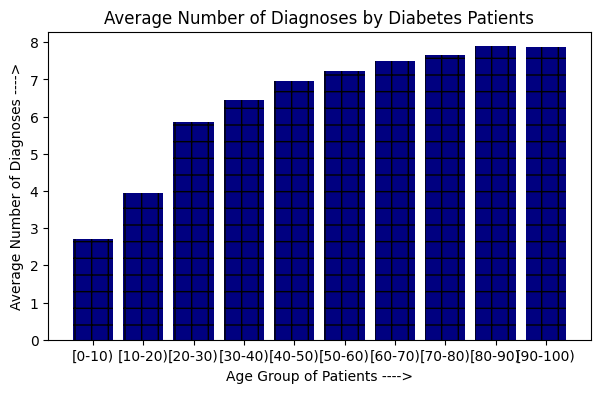

In [166]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.bar(l1,l2, color = "navy", hatch = "+")
plt.ylabel("Average Number of Diagnoses ---->")
plt.xlabel("Age Group of Patients ---->")

plt.title("Average Number of Diagnoses by Diabetes Patients")

plt.show()


Average number of Diagnoses increase significantly during early age but becomes steady between 7-8 procedures after 60 year of age.

In [167]:
df = diabetes.groupby(["insulin"]).size().sort_values(ascending = False)
df

insulin
No        47383
Steady    30849
Down      12218
Up        11316
dtype: int64

In [168]:
Steady = diabetes.loc[diabetes["insulin"]=="Steady"].count()[0]
Down = diabetes.loc[diabetes["insulin"]=="Down"].count()[0]
Up = diabetes.loc[diabetes["insulin"]=="Up"].count()[0]

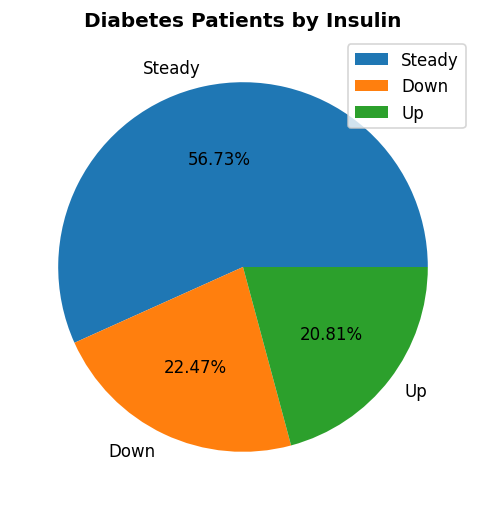

In [169]:
plt.figure(figsize = [5,5], dpi = 120)
labels = ["Steady", "Down", "Up"]

plt.pie([Steady, Down, Up], labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients by Insulin", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

Majority of patients have insulin level steady.

In [170]:
df = diabetes.groupby(["diabetesMed"]).size().sort_values(ascending = False)
df

diabetesMed
Yes    78363
No     23403
dtype: int64

In [171]:
Yes = diabetes.loc[diabetes["diabetesMed"]=="Yes"].count()[0]
No = diabetes.loc[diabetes["diabetesMed"]=="No"].count()[0]

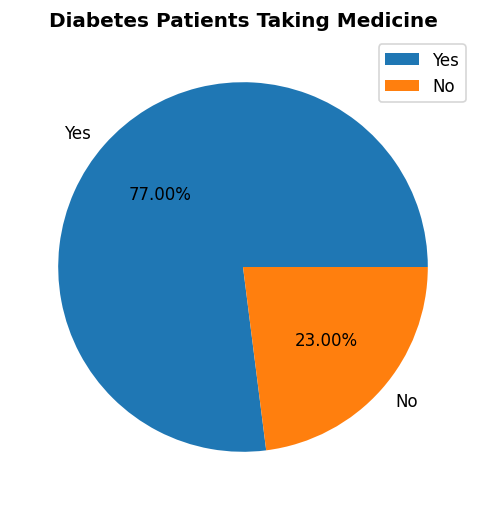

In [172]:
plt.figure(figsize = [5,5], dpi = 120)
labels = ["Yes", "No"]

plt.pie([Yes, No], labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients Taking Medicine", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

77% of patients are taking their medicines while 23% are not taking medicine.

In [173]:
# Load libraries
import numpy as np
import pandas as pd
import sys
import os


import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')


from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from tabulate import tabulate

In [174]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                81320 non-null   object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [ ]:
diabetes = diabetes.drop(columns = ['id','weight', 'encounter_id', 'patient_nbr','admission_type_id', 'discharge_disposition_id', 'admission_source_id','payer_code' ] )

In [176]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   time_in_hospital          101766 non-null  int64 
 4   medical_specialty         101766 non-null  object
 5   num_lab_procedures        101766 non-null  int64 
 6   num_procedures            101766 non-null  int64 
 7   num_medications           101766 non-null  int64 
 8   number_outpatient         101766 non-null  int64 
 9   number_emergency          101766 non-null  int64 
 10  number_inpatient          101766 non-null  int64 
 11  diag_1                    101766 non-null  object
 12  diag_2                    101765 non-null  object
 13  diag_3                    101765 non-null  object
 14  numb

In [177]:
diabetes.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# **Splitting the Dataset**

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Standardize the Dataset**

In [179]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[1.66043089e+00 4.62757333e-01 6.59504741e+01 4.40151329e+00
 2.17472363e+01 4.30778386e+01 1.33810740e+00 1.60083403e+01
 3.68115266e-01 1.98852749e-01 6.36122439e-01 3.36276421e+02
 2.76293384e+02 2.80951874e+02 7.42181742e+00 1.98345453e+00
 1.89511374e+00 1.19637154e+00 1.01558738e+00 1.00701371e+00
 1.00087211e+00 1.05056994e+00 1.22832015e-05 1.12001916e+00
 1.10121358e+00 2.45664030e-04 1.07148823e+00 1.06259519e+00
 1.00299710e+00 1.00028251e+00 3.68496045e-05 4.05345649e-04
 0.00000000e+00 0.00000000e+00 1.40523510e+00 1.00711197e+00
 1.47398418e-04 1.22832015e-05 2.45664030e-05 1.22832015e-05
 5.37451481e-01 1.42794674e+00]


In [180]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

# **Building the model and Fitting the Data**

In [181]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score


In [182]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [183]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.9999754335970127
Testing Accuracy: 0.9999508696079394
Testing Confusion Matrix: 
[[ 4608     0]
 [    1 15745]]
Recall Score :  0.9999508696079394
Precision Score :  0.9999508696079394
Testing F-1: 0.9999508696079394
Testing F-Beta: 0.9999508696079396
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.986083132707709
Testing Accuracy: 0.9732239363270119
Testing Confusion Matrix: 
[[ 4469   139]
 [  406 15340]]
Recall Score :  0.9732239363270119
Precision Score :  0.9732239363270119
Testing F-1: 0.9732239363270119
Testing F-Beta: 0.9732239363270119
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 1.0
Testing Confusion Matrix: 
[[ 4608     0]
 [    0 15746]]
Recall Score :  1.0
Precision Score :  1.0
Testing F-1: 1.0
Testing F-Beta: 1.0
------------------------------
Training Model RF 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0

As we see the Naive Bayes is the best algorithm with :

accuracy : 99%
F1 score : 99%

In [184]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display additional metrics (optional)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4608
           1       1.00      1.00      1.00     15746

    accuracy                           1.00     20354
   macro avg       1.00      1.00      1.00     20354
weighted avg       1.00      1.00      1.00     20354



In [186]:
diabetes

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,Pediatrics-Endocrinology,41,0,1,0,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,Pediatrics-Endocrinology,59,0,18,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,Pediatrics-Endocrinology,11,5,13,2,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,Pediatrics-Endocrinology,44,1,16,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,Pediatrics-Endocrinology,51,0,8,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,Orthopedics,51,0,16,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,Orthopedics,33,3,18,0,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,Orthopedics,53,0,9,1,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),10,Surgery-General,45,2,21,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [198]:
new_data = [[	1,2,(20-30),	2,11,	5,	13,	2, 0, 1, 648, 250,45,6,35,64,76,87,6523,43,55,13,34,6,23,34,  6,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0]]
if  model.predict(new_data)[0] == 0:
    print('not diabetic')
else: print('diabetic')

diabetic
